In [1]:
# Ch8 이미지를 위한 인공 신경망

In [2]:
# 8-1 합성곱 신경망의 구성 요소
# 합성곱 신경망 : 이미지 처리에 뛰어난 성능 발휘

In [5]:
# 합성곱(Convolution)
from tensorflow import keras
# 첫 번째 파라미터 : 필터의 개수
keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu', padding = 'same', strides =1)

In [8]:
# 풀링(Polling)
# 평균 풀링과 최대 풀링이 있는데, 보통 최대 풀링을 많이 사용함
# 풀링을 사용하는 이유 : 합성곱에서 스트라이드를 크게 해서 특성 맵을 줄이는 것보다 풀링 층에서 크기를 줄이는 것이
#                   경험적으로 더 나은 성능을 보여줌

# 풀링은 stride와 padding이 고정이므로 따로 지정할 일은 없을 것.
keras.layers.MaxPooling2D(2)
keras.layers.AveragePooling2D(2)


In [9]:
# 8-2 합성곱 신경망을 사용한 이미지 분류

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# 합성곱 층 추가
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape=(28, 28, 1)))

In [4]:
# 풀링 층 추가
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = 'relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 밀집층 추가
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

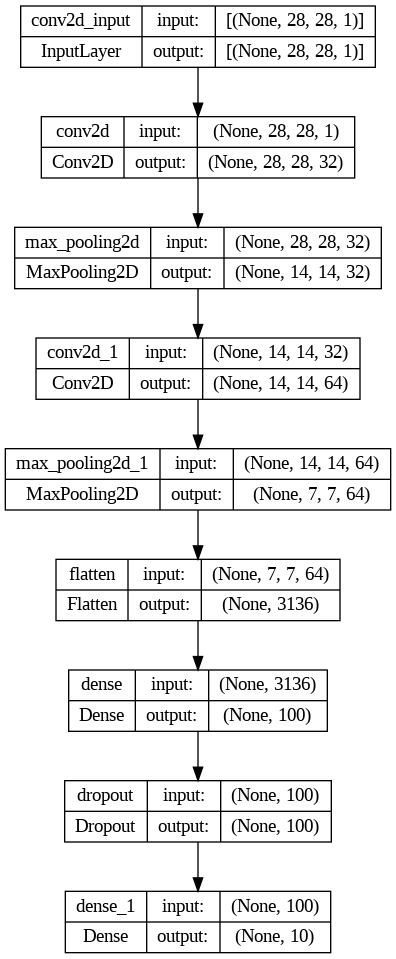

In [8]:
keras.utils.plot_model(model, show_shapes = True)

In [9]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights =True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data=(val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 21s 5ms/step - loss: 0.5196 - accuracy: 0.8153 - val_loss: 0.3274 - val_accuracy: 0.8808
Epoch 2/20
  30/1500 [..............................] - ETA: 5s - loss: 0.3910 - accuracy: 0.8521

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3441 - accuracy: 0.8762 - val_loss: 0.2844 - val_accuracy: 0.8919
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2914 - accuracy: 0.8944 - val_loss: 0.2510 - val_accuracy: 0.9040
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2616 - accuracy: 0.9057 - val_loss: 0.2598 - val_accuracy: 0.9038
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2356 - accuracy: 0.9149 - val_loss: 0.2326 - val_accuracy: 0.9133
Epoch 6/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2166 - accuracy: 0.9202 - val_loss: 0.2230 - val_accuracy: 0.9161
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2015 - accuracy: 0.9246 - val_loss: 0.2364 - val_accuracy: 0.9168
Epoch 8/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1855 - accuracy: 0.9308 - val_loss: 0.2364 - val_accuracy: 0.9161


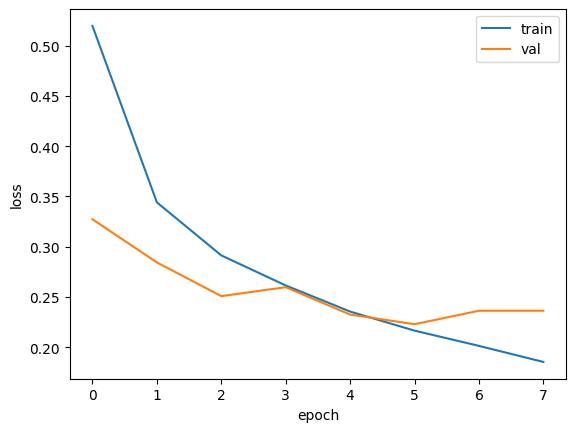

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2230 - accuracy: 0.9161


[0.22301723062992096, 0.9160833358764648]

NameError: ignored

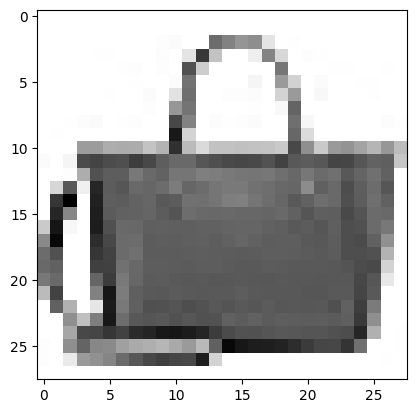

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
ply.show

In [13]:
# 원소가 하나이더라도 슬라이싱을 사용해야 전체 차원이 유지됨
preds = model.predict(val_scaled[0:1])
print(preds)
# 예측값을 보면 9번째로 분류하고 있는 걸 볼 수 있음

1/1 [==============================] - 0s 210ms/step
[[5.3064798e-14 6.9352497e-26 1.1019723e-18 2.0938512e-17 9.8625512e-17
  2.0933389e-18 6.8362886e-15 2.7766383e-21 1.0000000e+00 3.2683631e-20]]


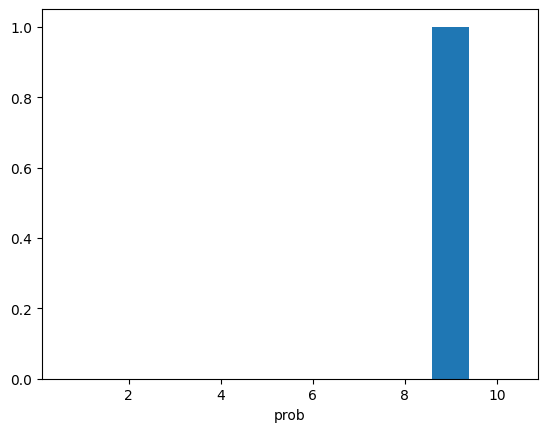

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.xlabel('prob')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
# 테스트 세트로 성능 확인
test_scaled = test_input.reshape(-1, 28, 28, 1)/255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2402 - accuracy: 0.9132


[0.24018359184265137, 0.9132000207901001]

In [18]:
# 8-3 합성곱 신경망의 시각화

In [19]:
from tensorflow import keras
model = keras.models.load_model('best_cnn_model.h5')

In [20]:
model.layers

In [21]:
# 각 layer의 가중치 확인
conv = model.layers[0]
# 첫 번째 원소 : 가중치
# 두 번째 원소 : bias
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [22]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.014706062 0.22051267


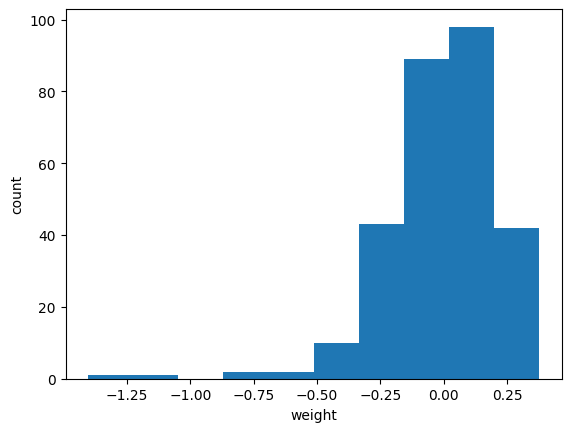

In [23]:
# 히스토그램을 그리기 위해 1차원 배열로 변환
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

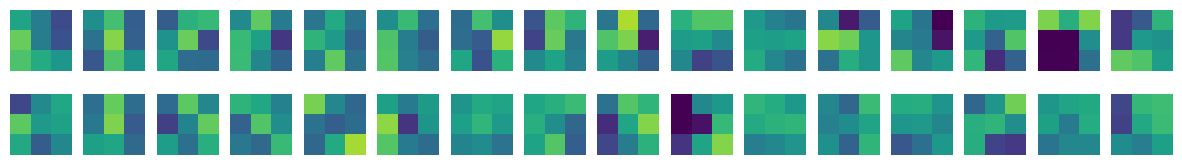

In [25]:
# 커널 확인
fig, axs = plt.subplots(2, 16, figsize= (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

In [27]:
# 훈련하지 않은 모델과 가중치 비교
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape=(28, 28, 1)))

In [28]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [29]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

# 평균은 비슷하지만 표준편차에서 차이가 많이 나는 것을 확인.

0.00030177252 0.08317622


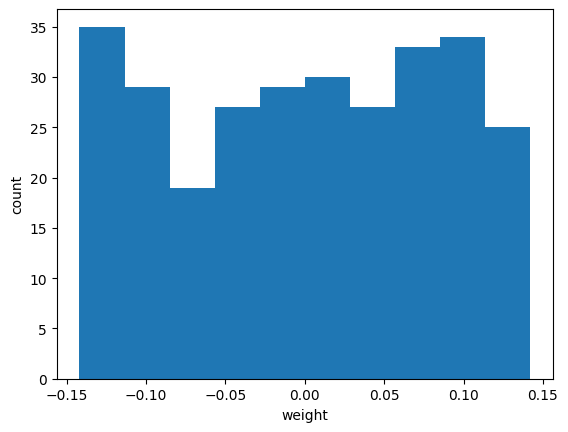

In [30]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 가중치가 고르게 분포되어있는 것을 확인
# 텐서플로우는 신경망의 가중치를 처음 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문

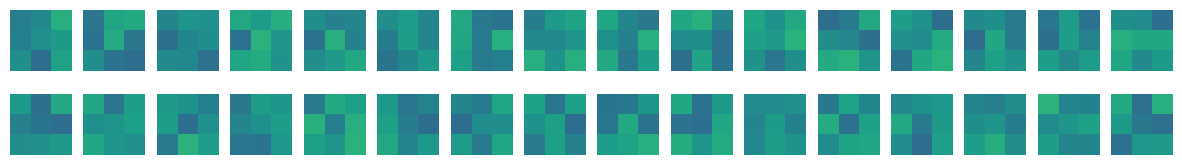

In [32]:
fig, axs = plt.subplots(2, 16, figsize = (15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin= -0.5, vmax = 0.5)
    axs[i, j].axis('off')
plt.show()

# 훈련된 모델보다 가중치가 밋밋한 것을 확인
# 합성곱 신경망이 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 사실 확인

In [33]:
# 함수형 API
# 함수형 API를 이용해 연결된 모델을 쉽게 만들 수 있음
conv_acti = keras.Model(model.input, model.layers[0].output)

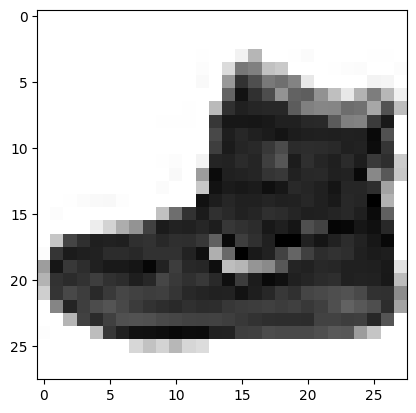

In [37]:
# 특성 맵 시각화
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [39]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 240ms/step


In [40]:
print(feature_maps.shape)

(1, 28, 28, 32)


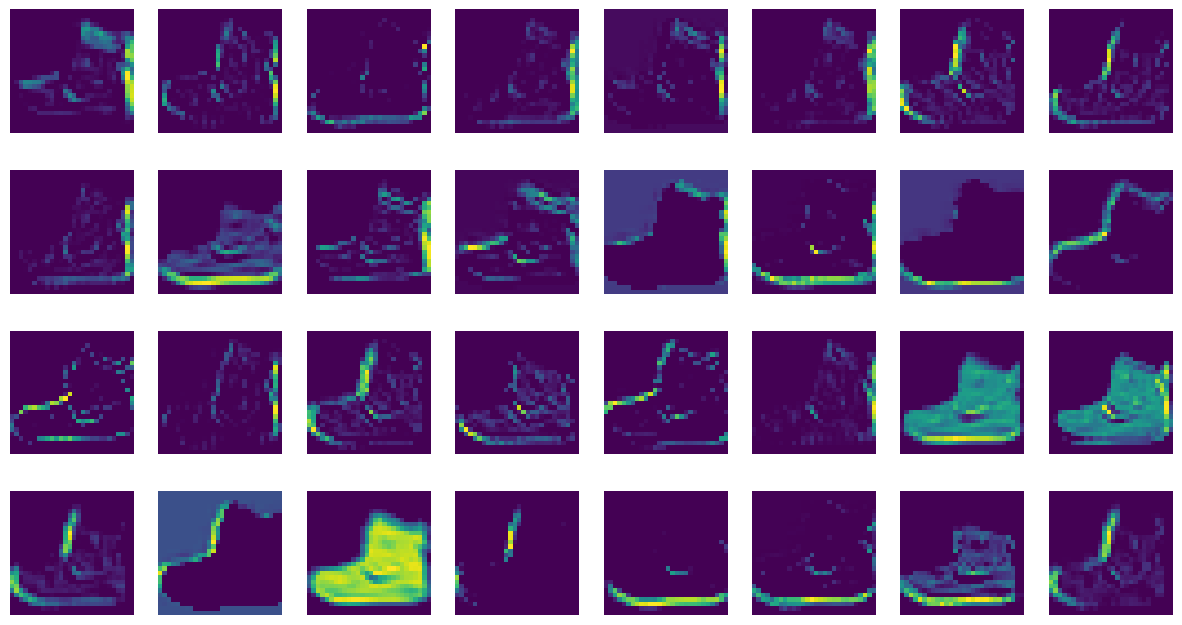

In [41]:
# 특성 맵 확인
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')
plt.show()

In [42]:
# 두 번째 합성곱 층이 만든 특성 맵도 확인
conv2_acti = keras.Model(model.input, model.layers[2].output)
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/ 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 131ms/step


In [44]:
print(feature_maps.shape)

(1, 14, 14, 64)


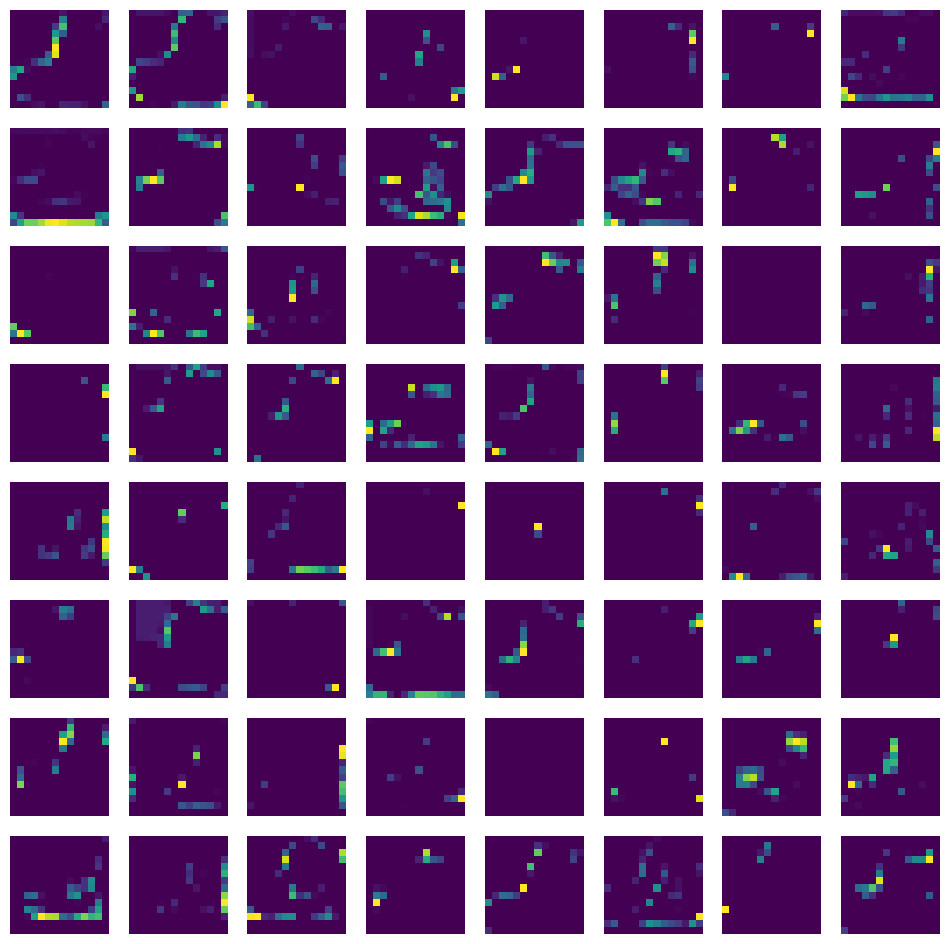

In [45]:
# 64개의 특성 맵 확인
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')

plt.show()

In [ ]:
# 두 번째 합성곱 층의 특성맵은 이해하기 어려움
# 첫 번째 합성곱 층은 이미지의 시각적인 정보를 감지하고, 이후 합성곱 층들은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있음.